Week 2: Analysis of Algorithms

Exercise:	Write	a	program	to	count	the	number	of	comparisons	in	a	sequential	search	for	an	
unsorted	array.

Challenge:	Design	and	implement	a	program	to	measure	and	graph	the	runtime	of	three	
algorithms	with	O(n),	O(n2),	and	O(n	log	n)	complexities	for	various	input	sizes	(e.g.,	n	=	
100,	500,	1000,	5000).

In [3]:
#Exercise

def LinearSearch(array, target):
    comparisons = 0
    for i in range(len(array)):
        comparisons+=1
        if array[i] == target:
            return (i, comparisons)
    return (-1, comparisons)

array = [1, 3, 7, 4, 5, 9]
target = 4
LinearSearch(array, target)


(3, 4)

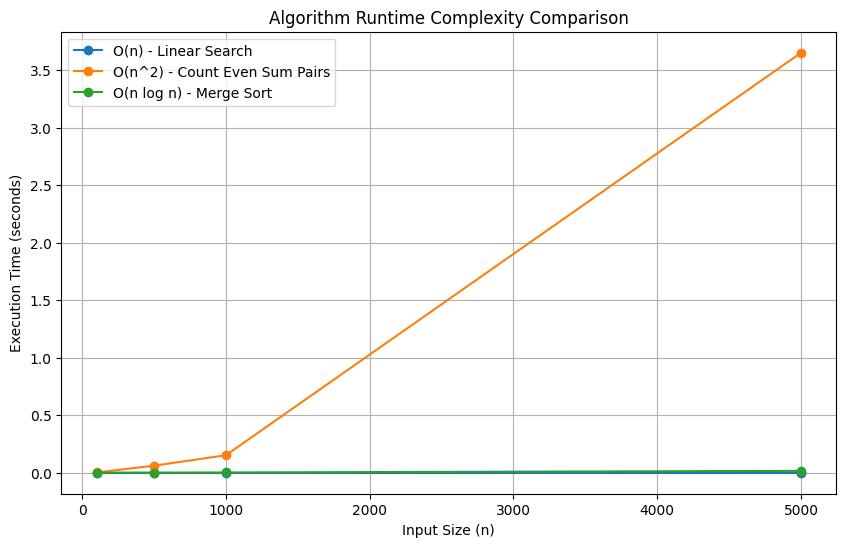

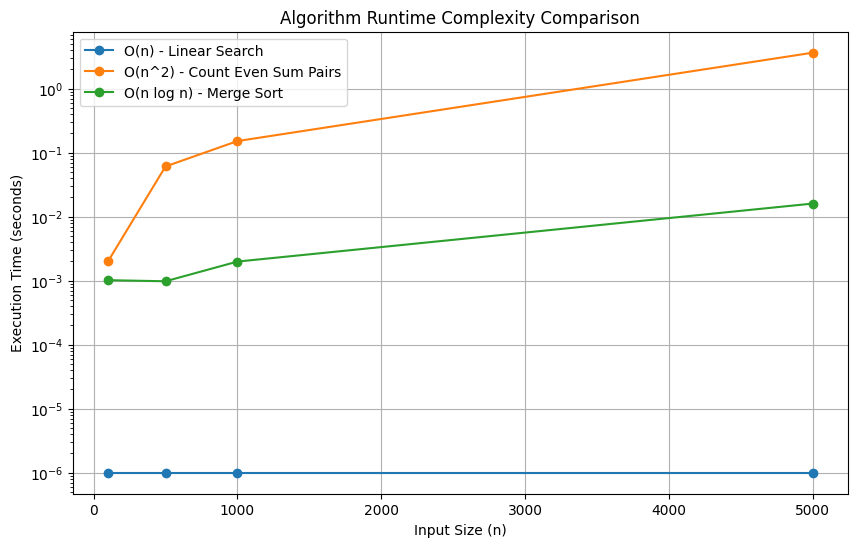

In [7]:
import random
import time
import matplotlib.pyplot as plt

# Generate a list with the given input size
def generate_num_list(n):
    return [random.randint(1, 1000000) for _ in range(n)]

# O(n) Linear Search
def LinearSearch(num_list, target):
    start = time.time()
    for i in range(len(num_list)):
        if num_list[i] == target:
            break  # Stop once the target is found
    end = time.time()
    return end - start

# O(n^2) Count Even Sum Pairs
def CountEvenSumPairs(num_list):
    count = 0
    start = time.time()
    for i in range(len(num_list)):
        for j in range(len(num_list)):
            if (num_list[i] + num_list[j]) % 2 == 0:
                count += 1
    end = time.time()
    return end - start

# Merge Sort Function (without runtime measurement)
def MergeSortHelper(num_list):
    if len(num_list) <= 1:
        return num_list
    
    mid = len(num_list) // 2
    left_half = MergeSortHelper(num_list[:mid])
    right_half = MergeSortHelper(num_list[mid:])
    
    result = []
    i = j = 0
    while i < len(left_half) and j < len(right_half):
        if left_half[i] <= right_half[j]:
            result.append(left_half[i])
            i += 1
        else:
            result.append(right_half[j])
            j += 1
    result.extend(left_half[i:])
    result.extend(right_half[j:])
    return result

# Measure execution time of MergeSort
def MeasureMergeSort(num_list):
    start = time.time()
    MergeSortHelper(num_list)
    end = time.time()
    return end - start

# Main function to run and plot results
def main():
    input_sizes = [100, 500, 1000, 5000]
    linear_times = []
    quadratic_times = []
    polylogarithmic_times = []

    for n in input_sizes:
        num_list = generate_num_list(n)
        target = random.choice(num_list)

        # Measure runtime for each algorithm
        linear_times.append(LinearSearch(num_list, target))
        quadratic_times.append(CountEvenSumPairs(num_list))
        polylogarithmic_times.append(MeasureMergeSort(num_list))

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, linear_times, label="O(n) - Linear Search", marker="o")
    plt.plot(input_sizes, quadratic_times, label="O(n^2) - Count Even Sum Pairs", marker="o")
    plt.plot(input_sizes, polylogarithmic_times, label="O(n log n) - Merge Sort", marker="o")
    
    plt.xlabel("Input Size (n)")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Algorithm Runtime Complexity Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

    #plotting the results - logarithmic scale
    plt.figure(figsize=(10, 6))
    linear_times = [t + 1e-6 for t in linear_times]
    quadratic_times = [t + 1e-6 for t in quadratic_times]
    polylogarithmic_times = [t + 1e-6 for t in polylogarithmic_times]

    plt.plot(input_sizes, linear_times, label="O(n) - Linear Search", marker="o")
    plt.plot(input_sizes, quadratic_times, label="O(n^2) - Count Even Sum Pairs", marker="o")
    plt.plot(input_sizes, polylogarithmic_times, label="O(n log n) - Merge Sort", marker="o")
    
    plt.xlabel("Input Size (n)")
    plt.ylabel("Execution Time (seconds)")
    plt.yscale('log')
    plt.title("Algorithm Runtime Complexity Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

   

if __name__ == "__main__":
    main()

